In [174]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [175]:
url='https://raw.githubusercontent.com/MeitavReut/project300/main/%D7%99%D7%95%D7%A7%D7%A8%20%D7%94%D7%9E%D7%97%D7%99%D7%94%20%D7%90%D7%A8%D7%94%D7%91.csv'

In [176]:
us_cost_df=pd.read_csv(url)
us_cost_df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625


In [177]:
#פיצלנו את העמודה של חברי המשפחה להורים וילדים בנפרד
df = pd.DataFrame(us_cost_df)

df['adults'] = df['family_member_count'].str.extract(r'(\d+)p')[0].astype(int)
df['children'] = df['family_member_count'].str.extract(r'p(\d+)c')[0].astype(int)

us_cost_df=df
us_cost_df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adults,children
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625,2,3


**מסקנה1-האם יש קשר בין יוקר המחיה לבין כמות הילדים**

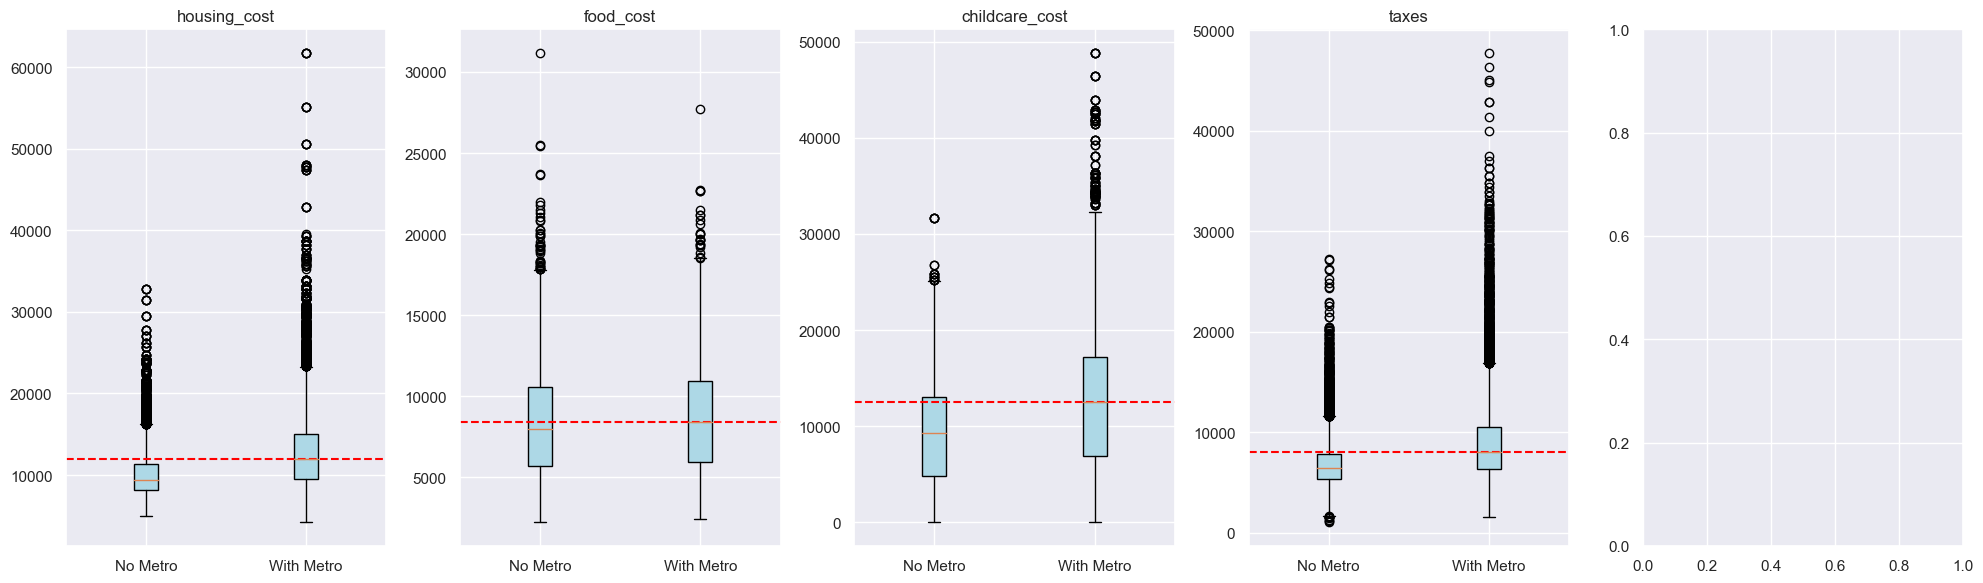

In [178]:
#בדקנו את הפער בין המקומות שבהם יש מטרו לבין המקומות בהם איו מטרו 
#בדקנו רק את הנתונים המשפיעים על לגידול הילדים
# רכיבת הגרפים
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

# רשימת עמודות המתארות את ההוצאות
cost_columns = ['housing_cost', 'food_cost', 'childcare_cost', 'taxes']

for i, column in enumerate(cost_columns):
    bp = axes[i].boxplot([df[df['isMetro'] == 0][column], df[df['isMetro'] == 1][column]], patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(column)
    axes[i].axhline(y=df[df['isMetro'] == 1][column].median(), color='red', linestyle='--')
    axes[i].set_xticklabels(['No Metro', 'With Metro'])

# הצגת הגרפים
plt.tight_layout()
plt.show()



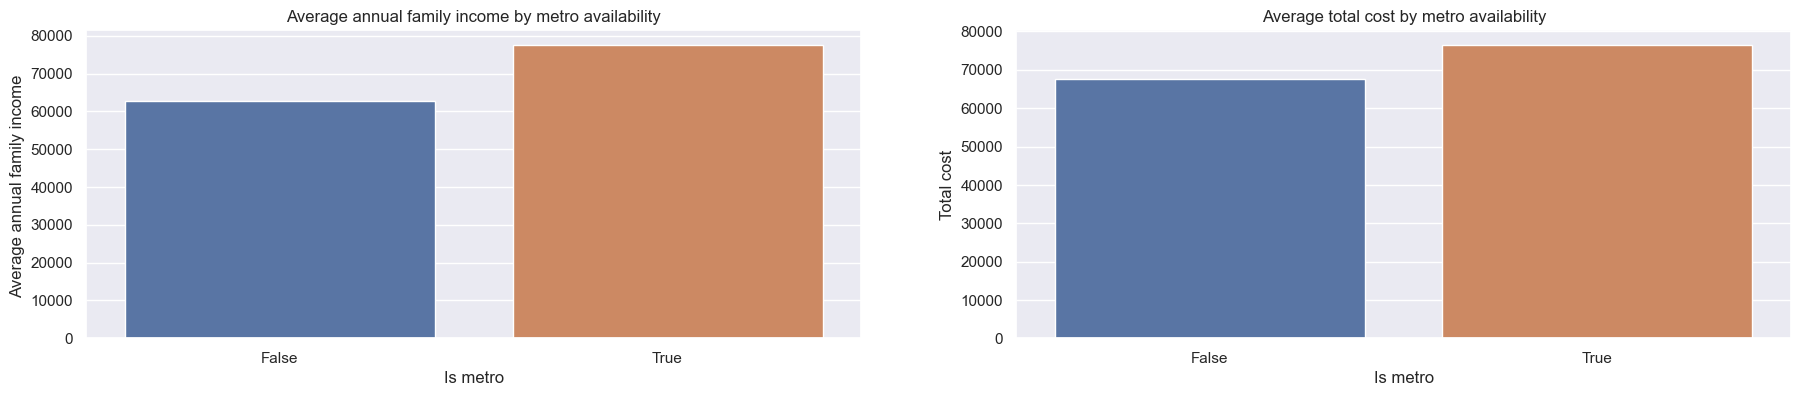

In [179]:
# Group by metro availability and calculate the mean annual living cost for both cases
metro = us_cost_df.groupby('isMetro')['total_cost'].agg('mean')
metro_income = us_cost_df.groupby('isMetro')['median_family_income'].agg('mean')

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 4))

# Create a barplot
sns.barplot(x=metro_income.index, y=metro_income.values, ax=ax[0])

# Configure the plot
ax[0].set_title('Average annual family income by metro availability')
ax[0].set_xlabel('Is metro')
ax[0].set_ylabel('Average annual family income ')


# Create a barplot 
sns.barplot(x=metro.index, y=metro.values, ax=ax[1])

# Configure the plot
ax[1].set_title('Average total cost by metro availability')
ax[1].set_xlabel('Is metro')
ax[1].set_ylabel('Total cost')

# Display the plot
plt.show()

**לפי הגרפים, בחישוב מהיר עדיף לגור ביישוב, ההוצאות שם קטנות יותר**

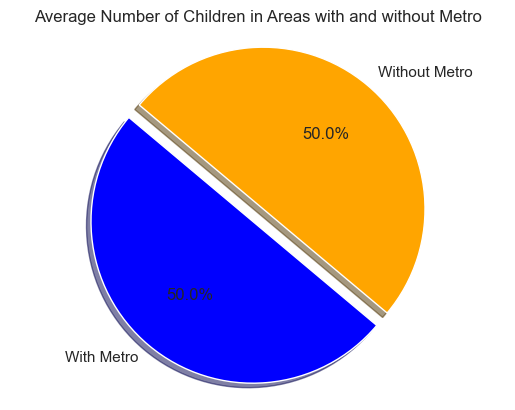

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# הנח שה-DataFrame שלך כבר קיים ושמו df
# df = pd.read_csv('path_to_your_data.csv')

# חישוב הממוצע של עמודת 'children' עבור ערים עם רכבות
average_children_with_metro =us_cost_df[us_cost_df['isMetro'] == 1]['children'].mean()

# חישוב הממוצע של עמודת 'children' עבור ערים בלי רכבות
average_children_without_metro = us_cost_df[us_cost_df['isMetro'] == 0]['children'].mean()

# יצירת נתונים עבור גרף העוגה
labels = ['With Metro', 'Without Metro']
sizes = [average_children_with_metro, average_children_without_metro]
colors = ['blue', 'orange']
explode = (0.1, 0)  # להוציא את הפרוסה הראשונה החוצה

# יצירת גרף עוגה
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Average Number of Children in Areas with and without Metro')
plt.axis('equal')  # שימור עיגול מדויק
plt.show()



**ממוצע חיסכון**

In [181]:
#  עם רכבת
#סינון הנתונים לערים עם מטרו
metro_cities = us_cost_df[us_cost_df['isMetro'] == True]

# חישוב ממוצע הכנסות
average_income_metro = metro_cities['median_family_income'].mean()

# חישוב ממוצע הוצאות
average_expenses_metro = metro_cities['total_cost'].mean()

# חישוב ממוצע הכנסות (ממוצע הכנסות פחות ממוצע הוצאות)
average_income_minus_expenses_metro = average_income_metro - average_expenses_metro

print(f"Average income in metro areas: {average_income_minus_expenses_metro:.2f}")

#סינון הנתונים לערים עם מטרו
metro_cities = us_cost_df[us_cost_df['isMetro'] == False]

# חישוב ממוצע הכנסות
average_income_metro = metro_cities['median_family_income'].mean()

# חישוב ממוצע הוצאות
average_expenses_metro = metro_cities['total_cost'].mean()

# חישוב ממוצע הכנסות (ממוצע הכנסות פחות ממוצע הוצאות)
average_income_minus_expenses_metro = average_income_metro - average_expenses_metro

print(f"Average income in metro areas: {average_income_minus_expenses_metro:.2f}")


Average income in metro areas: 1092.19
Average income in metro areas: -4761.99


**הרבה יותר משתלם לגור בעיר גם חוסכים יותר , גם גרים קרוב למטרו, גם קרובים בכללי להכל, וגם מביאים אותם כמות ילדים בממוצע**

**רצינו לראות את ההתפלגות של יוקר המחיה במחוזות ארה"ב מסקנה 2**


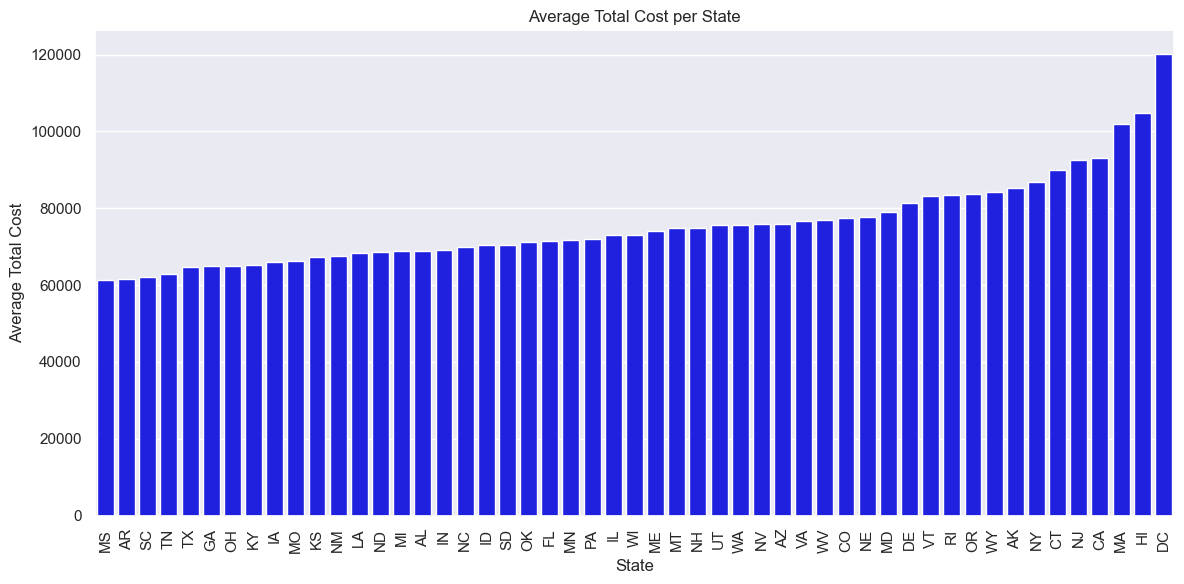

In [277]:
# חישוב ה-total cost ממוצע לכל מדינה
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# יצירת גרף בר המראה את ה-total cost ממוצע לכל מדינה
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total_cost', data=average_total_cost, color='blue')
plt.xlabel('State')
plt.ylabel('Average Total Cost')
plt.title('Average Total Cost per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**חיפשנו 2 מדינות בעלות מספר מחוזות דומות כדי להשוות ביינהם את הפער בין הוצאות לבריאות בייחס להכנסות**

In [216]:
#מדינת Ny - מייצגת מדינה בעלת הוצאות גבוהות

# Filter rows for the state of Hawaii (HI)
hawaii_data = us_cost_df[us_cost_df['state'] == 'LA']

# Count the number of rows for Hawaii
hawaii_row_count = hawaii_data.shape[0]

# Display the result
print(f"Number of rows for the state of Hawaii (LA): {hawaii_row_count}")


Number of rows for the state of Hawaii (LA): 640


In [217]:
#la - מייצגת מדינה בעלת הוצאות נמוכות יחסית

# Filter rows for the state of Hawaii (HI)
hawaii_data = us_cost_df[us_cost_df['state'] == 'NY']

# Count the number of rows for Hawaii
hawaii_row_count = hawaii_data.shape[0]

# Display the result
print(f"Number of rows for the state of Hawaii (NY): {hawaii_row_count}")


Number of rows for the state of Hawaii (NY): 620


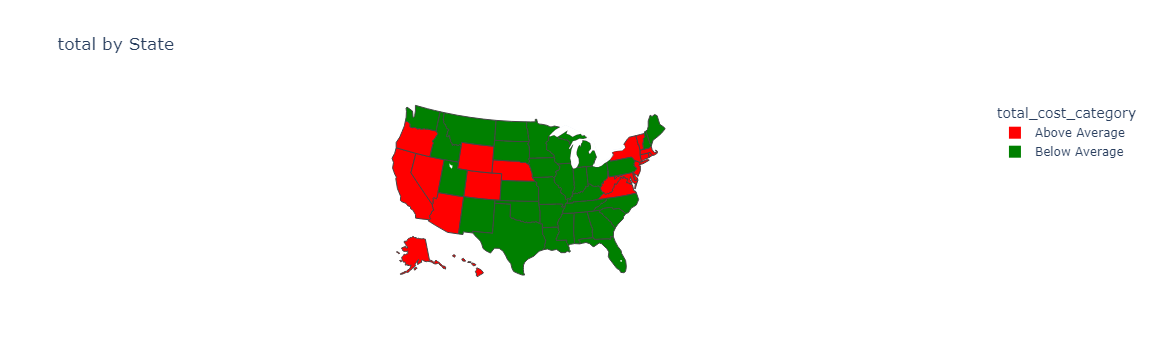

In [311]:
import pandas as pd
import plotly.express as px


# Group by state and calculate the mean income
state_tote_mean =us_cost_df.groupby('county')['total_cost'].mean().reset_index()

# Calculate the overall mean income
overall_mean_tote = state_tote_mean['total_cost'].mean()

# Create a new column to classify states above or below the mean
state_tote_mean['total_cost_category'] = state_tote_mean['total_cost'].apply(
    lambda x: 'Above Average' if x > overall_mean_tote else 'Below Average'
)

# Define colors for above and below average
color_scale = {
    'Above Average': 'red',
    'Below Average': 'green'
}

# Create the choropleth map
fig = px.choropleth(state_income_mean,
                    locationmode="USA-states",
                    locations="state", 
                    color="total_cost_category", 
                    hover_name="state", 
                    color_discrete_map=color_scale,
                    scope='usa', 
                    title='total by State')

# Show the plot
fig.show()


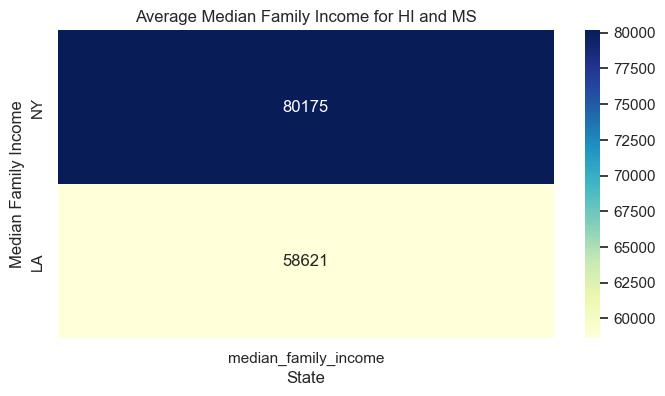

In [218]:

# סינון הנתונים לפי מדינה
df_states = us_cost_df[['state', 'median_family_income']].copy()

# בחירת מדינות HI ו-MS
selected_states = ['LA', 'NY']
df_selected_states = df_states[df_states['state'].isin(selected_states)]

# יצירת טבלה פיבוט עבור ממוצע ההכנסה המשפחתית לפי מדינה
pivot_table = df_selected_states.pivot_table(values='median_family_income', index='state', aggfunc='mean')

# מיון הטבלה לפי ממוצע ההכנסה המשפחתית
pivot_table_sorted = pivot_table.sort_values(by='median_family_income', ascending=False)

# עיצוב והצגה של הטבלה
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table_sorted, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Median Family Income for HI and MS')
plt.xlabel('State')
plt.ylabel('Median Family Income')
plt.show()


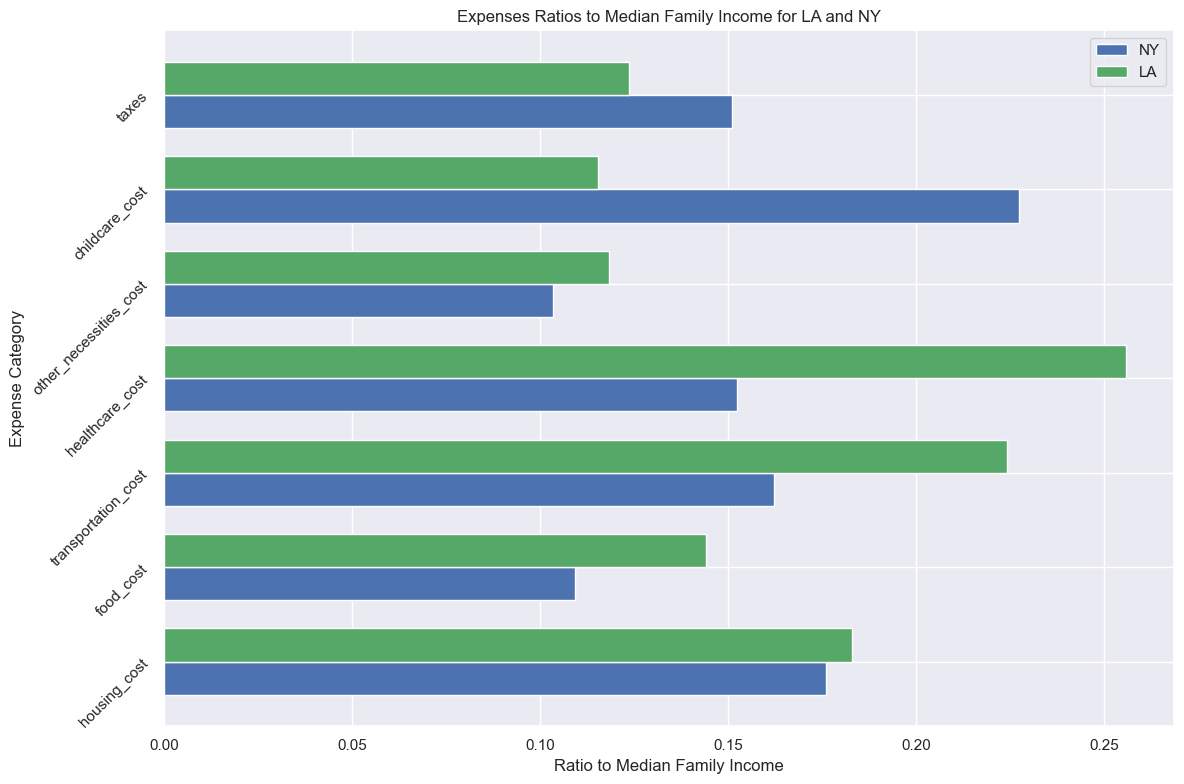

In [222]:

# Filter data for states NY and LA
df_ny = us_cost_df[us_cost_df['state'] == 'NY']
df_la = us_cost_df[us_cost_df['state'] == 'LA']

# Calculate average median family income for NY and LA
income_ny_mean = df_ny['median_family_income'].mean()
income_la_mean = df_la['median_family_income'].mean()

# Columns representing different expense categories
expenses_cols = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

# Calculate average expenses for NY and LA
expenses_ny_means = df_ny[expenses_cols].mean()
expenses_la_means = df_la[expenses_cols].mean()

# Create a horizontal bar plot comparing the expenses to median family income ratios for NY and LA
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(expenses_cols))
plt.barh(index, expenses_ny_means / income_ny_mean, bar_width, label='NY', color='b')
plt.barh([i + bar_width for i in index], expenses_la_means / income_la_mean, bar_width, label='LA', color='g')

plt.ylabel('Expense Category')
plt.xlabel('Ratio to Median Family Income')
plt.title('Expenses Ratios to Median Family Income for LA and NY')
plt.yticks([i + bar_width / 2 for i in index], expenses_cols, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [187]:
#באופן גורף במדינות היקרות יותר מוציאים פחות על בריאות תחבורה ואוכל לעומת המדינות הזולות 

In [190]:
#רצינו להשוות בין כל המדינות בין ההכנסה של משפחה לבין הוצאות על הבריאות
# עשינו ממוצע בין ההכנסה והכנסנו לגרף אחד מדינות עשירות ולגרף שני מדינות עניות 
# ובדקנו

In [191]:
#מדינות יקרות

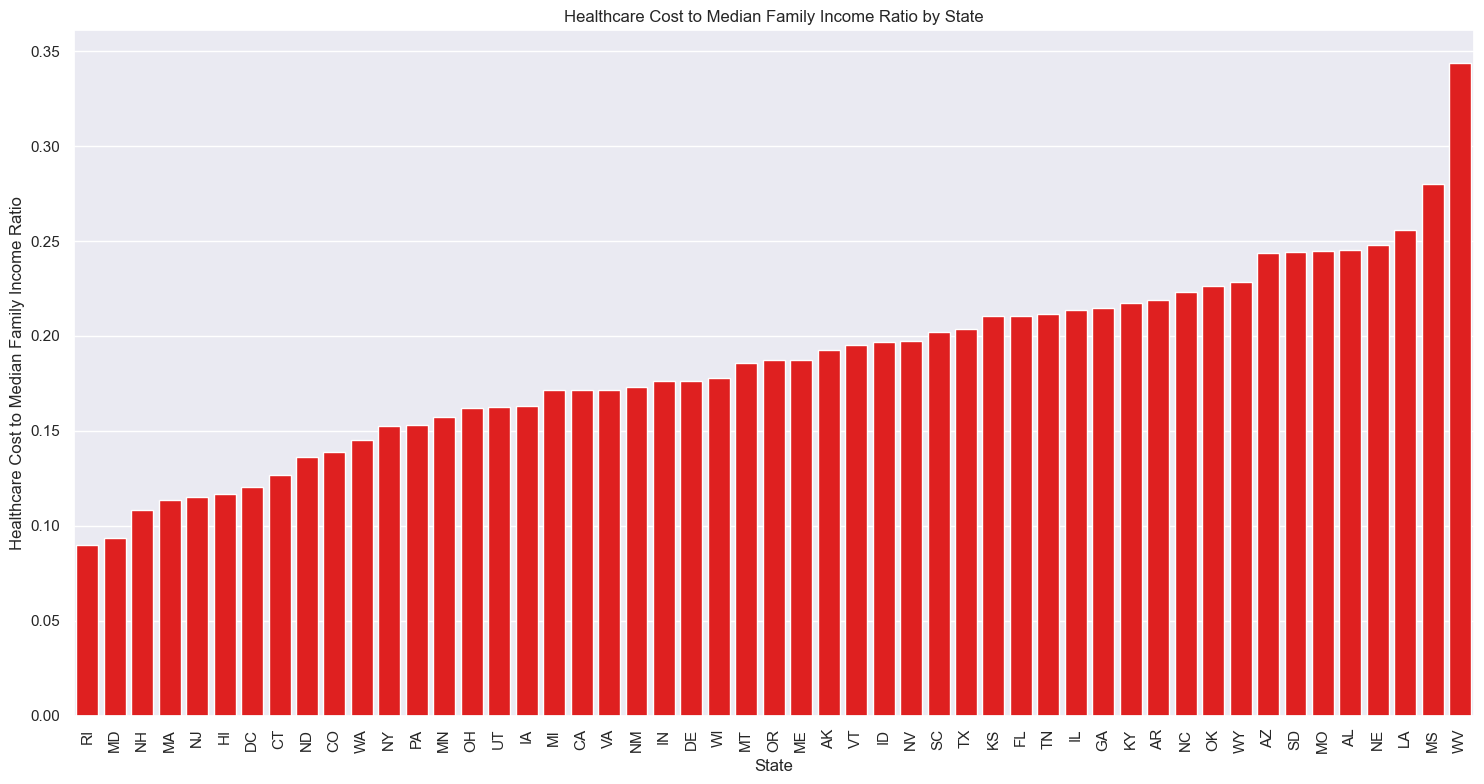

In [281]:
# Calculate the average median family income and average healthcare cost for each state
average_income = us_cost_df.groupby('state')['median_family_income'].mean().reset_index()
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_income, average_healthcare_cost, on='state')

# Calculate the ratio of average healthcare cost to average median family income for each state
average_data['healthcare_to_income_ratio'] = average_data['healthcare_cost'] / average_data['median_family_income']

# Sort the data by the ratio
average_data_sorted = average_data.sort_values('healthcare_to_income_ratio', ascending=True)

# Create a vertical bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='healthcare_to_income_ratio', data=average_data_sorted, color='red', order=average_data_sorted['state'])

plt.xlabel('State')
plt.ylabel('Healthcare Cost to Median Family Income Ratio')
plt.title('Healthcare Cost to Median Family Income Ratio by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


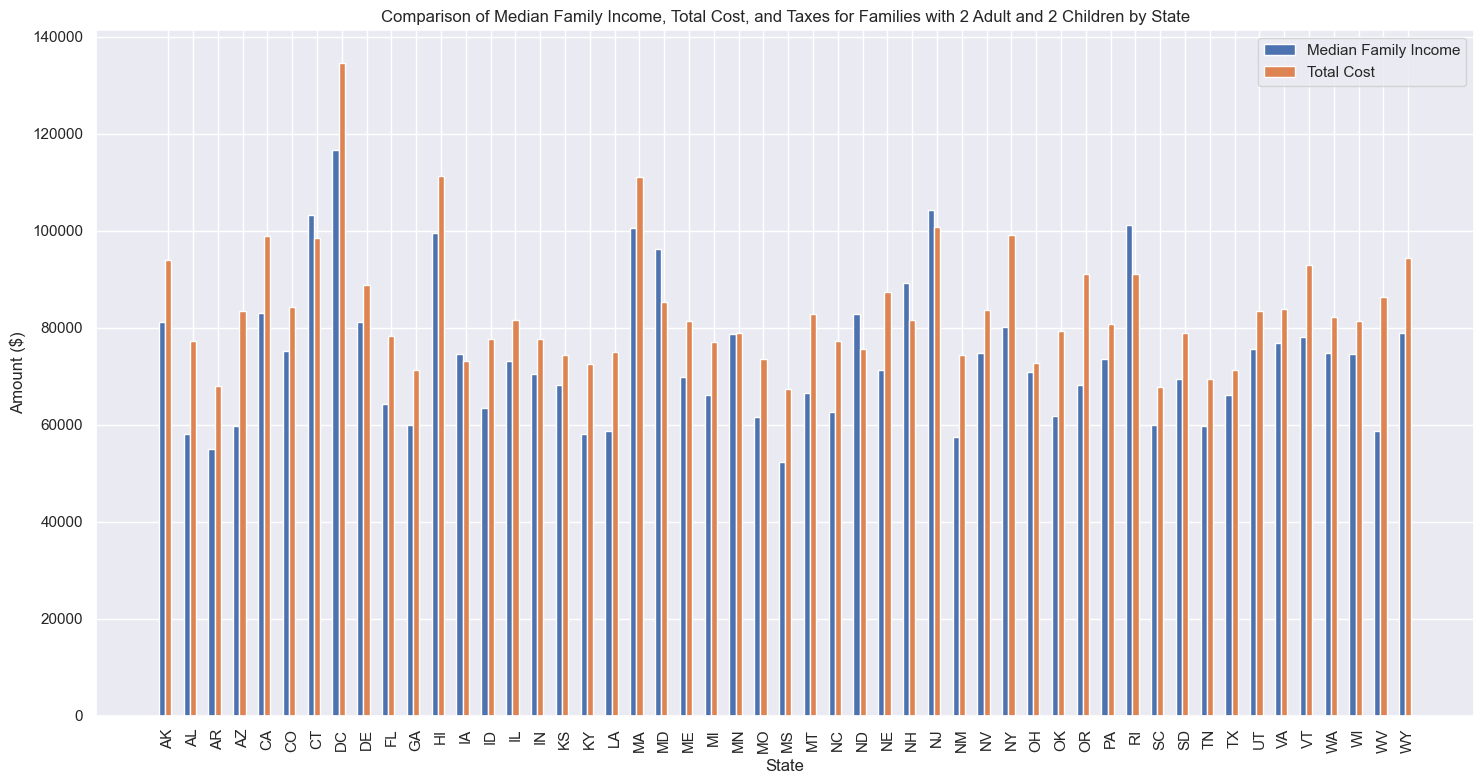

In [196]:
import pandas as pd
import matplotlib.pyplot as plt


# סינון הנתונים לשורות בהן 'family_member_count' הוא '1p4c'
filtered_df = us_cost_df[us_cost_df['family_member_count'] == '2p2c']

# קיבוץ לפי מדינה וחישוב ממוצעים של 'median_family_income', 'total_cost' ו-'taxes'
state_grouped = filtered_df.groupby('state')[['median_family_income', 'total_cost']].mean().reset_index()

# יצירת גרף בר השוואתי עבור כל מדינה
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.25
index = range(len(state_grouped))

bar1 = plt.bar(index, state_grouped['median_family_income'], bar_width, label='Median Family Income')
bar2 = plt.bar([i + bar_width for i in index], state_grouped['total_cost'], bar_width, label='Total Cost')


plt.xlabel('State')
plt.ylabel('Amount ($)')
plt.title('Comparison of Median Family Income, Total Cost, and Taxes for Families with 2 Adult and 2 Children by State')
plt.xticks([i + bar_width for i in index], state_grouped['state'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


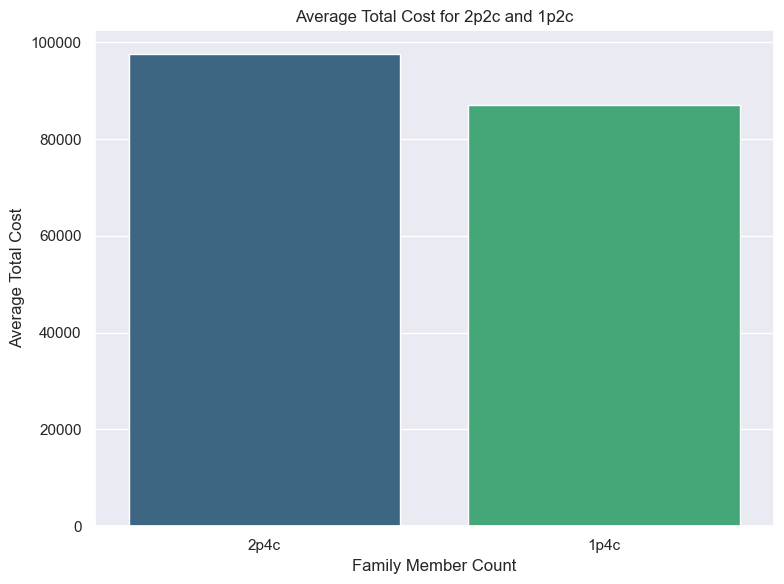

In [261]:


# Filter data for family_member_count with 2p2c and 1p2c
data_2p2c = us_cost_df[us_cost_df['family_member_count'] == '2p4c']
data_1p2c = us_cost_df[us_cost_df['family_member_count'] == '1p4c']

# Calculate average total cost for 2p2c and 1p2c
average_total_cost_2p2c = data_2p2c['total_cost'].mean()
average_total_cost_1p2c = data_1p2c['total_cost'].mean()

# Create a DataFrame to hold the results
average_cost_data = pd.DataFrame({
    'Family Member Count': ['2p4c', '1p4c'],
    'Average Total Cost': [average_total_cost_2p2c, average_total_cost_1p2c]
})

# Create a bar plot showing the average total cost for 2p2c and 1p2c
plt.figure(figsize=(8, 6))
sns.barplot(x='Family Member Count', y='Average Total Cost', data=average_cost_data, palette='viridis')

plt.xlabel('Family Member Count')
plt.ylabel('Average Total Cost')
plt.title('Average Total Cost for 2p2c and 1p2c')
plt.tight_layout()
plt.show()
#הוצאות זהות על ילדים ועל דיור 

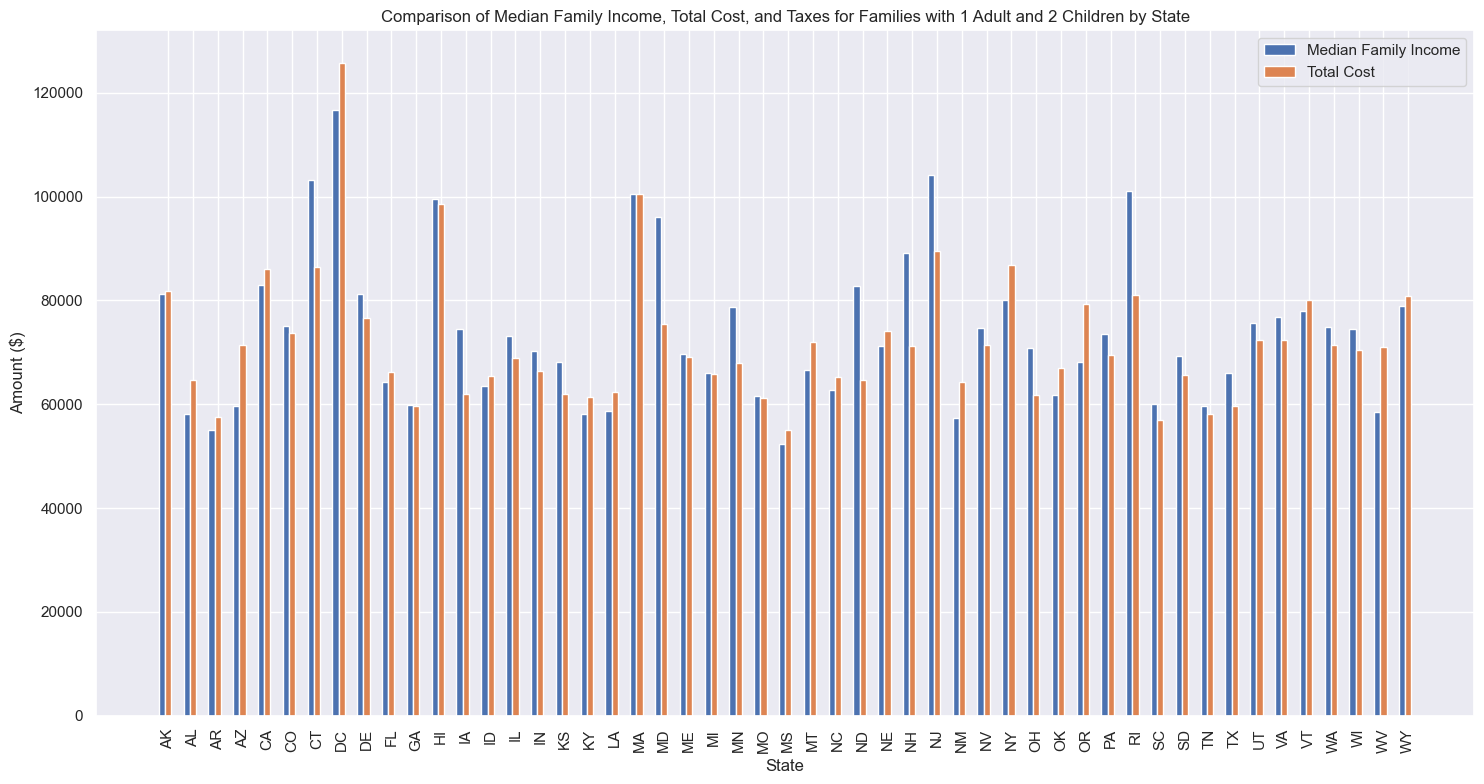

In [197]:
import pandas as pd
import matplotlib.pyplot as plt


# סינון הנתונים לשורות בהן 'family_member_count' הוא '1p4c'
filtered_df = us_cost_df[us_cost_df['family_member_count'] == '1p2c']

# קיבוץ לפי מדינה וחישוב ממוצעים של 'median_family_income', 'total_cost' ו-'taxes'
state_grouped = filtered_df.groupby('state')[['median_family_income', 'total_cost']].mean().reset_index()

# יצירת גרף בר השוואתי עבור כל מדינה
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.25
index = range(len(state_grouped))

bar1 = plt.bar(index, state_grouped['median_family_income'], bar_width, label='Median Family Income')
bar2 = plt.bar([i + bar_width for i in index], state_grouped['total_cost'], bar_width, label='Total Cost')

plt.xlabel('State')
plt.ylabel('Amount ($)')
plt.title('Comparison of Median Family Income, Total Cost, and Taxes for Families with 1 Adult and 2 Children by State')
plt.xticks([i + bar_width for i in index], state_grouped['state'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

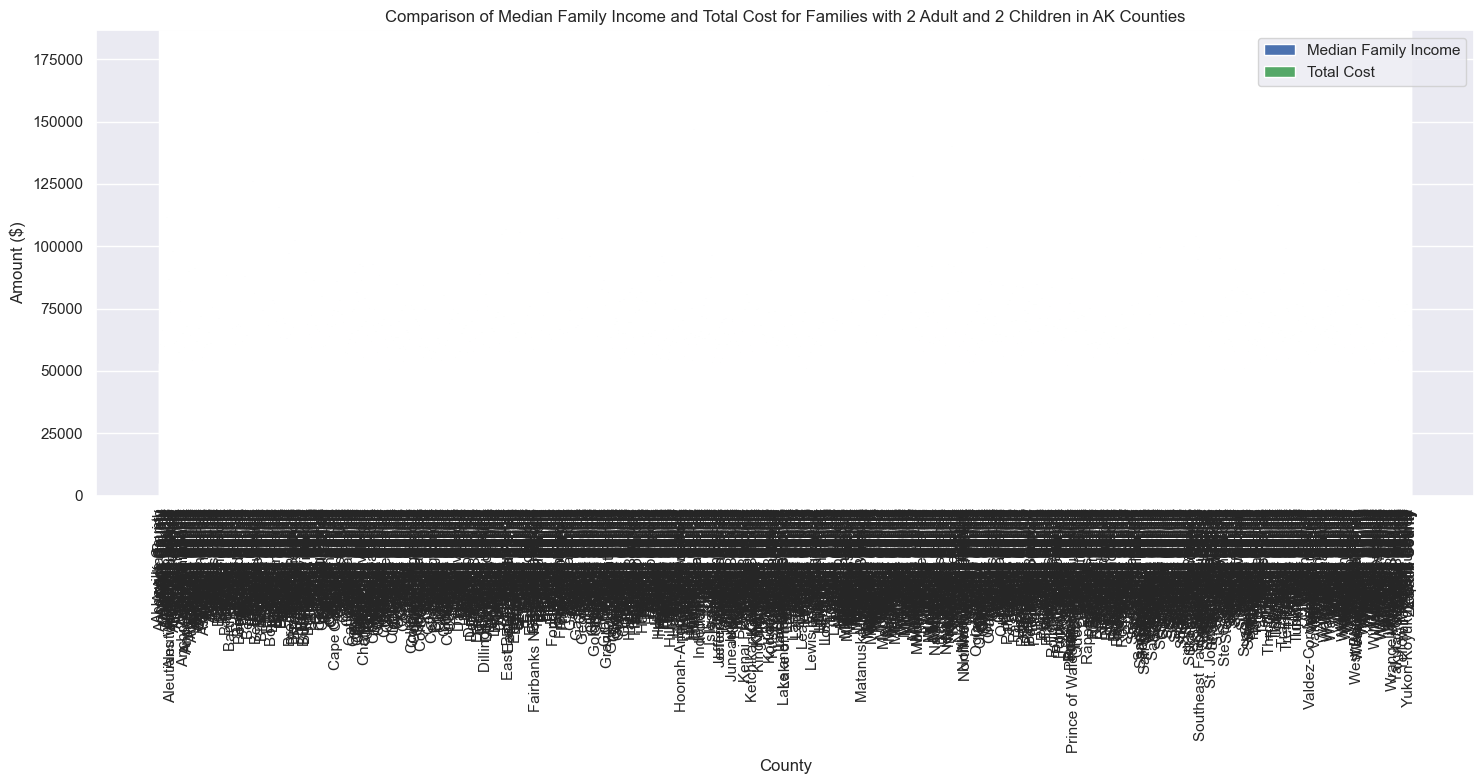

In [264]:

# Group by county and calculate the averages of 'median_family_income' and 'total_cost'
county_grouped = filtered_df.groupby('county')[['median_family_income', 'total_cost']].mean().reset_index()

# Create a comparative bar graph for each county in AK
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.35
index = range(len(county_grouped))

bar1 = plt.bar(index, county_grouped['median_family_income'], bar_width, label='Median Family Income', color='b')
bar2 = plt.bar([i + bar_width for i in index], county_grouped['total_cost'], bar_width, label='Total Cost', color='g')

plt.xlabel('County')
plt.ylabel('Amount ($)')
plt.title('Comparison of Median Family Income and Total Cost for Families with 2 Adult and 2 Children in AK Counties')
plt.xticks([i + bar_width for i in index], county_grouped['county'], rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


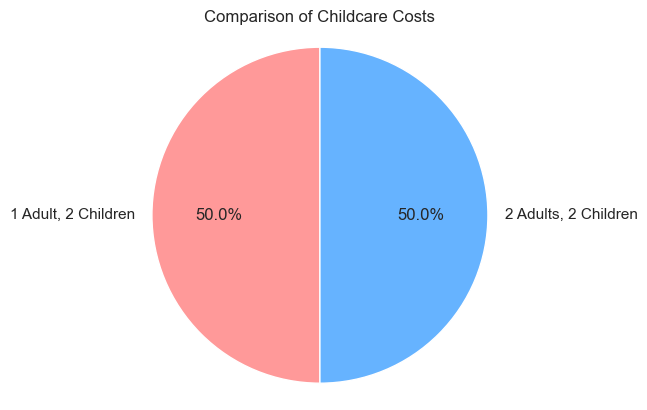

In [198]:
import pandas as pd
import matplotlib.pyplot as plt



# סינון הנתונים לשורות בהן 'family_member_count' הוא '1p2c' או '2p2c'
filtered_1p2c = us_cost_df[us_cost_df['family_member_count'] == '1p2c']
filtered_2p2c = us_cost_df[us_cost_df['family_member_count'] == '2p2c']

# חישוב ממוצע של 'childcare_cost' עבור שתי הקבוצות
mean_childcare_cost_1p2c = filtered_1p2c['median_family_income'].mean()
mean_childcare_cost_2p2c = filtered_2p2c['median_family_income'].mean()

# יצירת גרף עוגה להשוואת עלויות הטיפול בילדים
labels = ['1 Adult, 2 Children', '2 Adults, 2 Children']
sizes = [mean_childcare_cost_1p2c, mean_childcare_cost_2p2c]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Comparison of Childcare Costs')
plt.show()

#ההכנסות זהות בשני המקרים
#המיסים והעליות אוכל גבוהות כשאר יש 2 הוורים

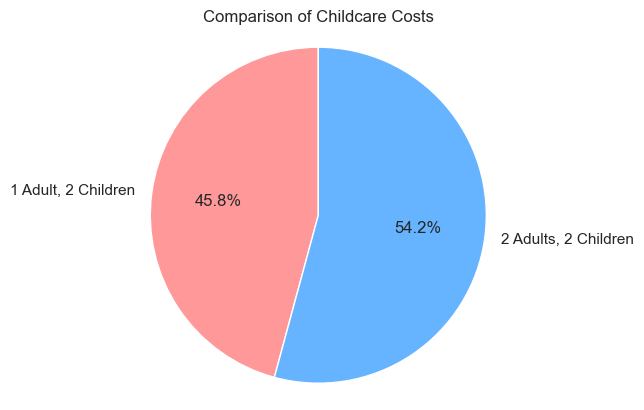

In [199]:

# סינון הנתונים לשורות בהן 'family_member_count' הוא '1p2c' או '2p2c'
filtered_1p2c = us_cost_df[us_cost_df['family_member_count'] == '1p2c']
filtered_2p2c = us_cost_df[us_cost_df['family_member_count'] == '2p2c']

# חישוב ממוצע של 'childcare_cost' עבור שתי הקבוצות
mean_childcare_cost_1p2c = filtered_1p2c['taxes'].mean()
mean_childcare_cost_2p2c = filtered_2p2c['taxes'].mean()

# יצירת גרף עוגה להשוואת עלויות הטיפול בילדים
labels = ['1 Adult, 2 Children', '2 Adults, 2 Children']
sizes = [mean_childcare_cost_1p2c, mean_childcare_cost_2p2c]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Comparison of Childcare Costs')
plt.show()

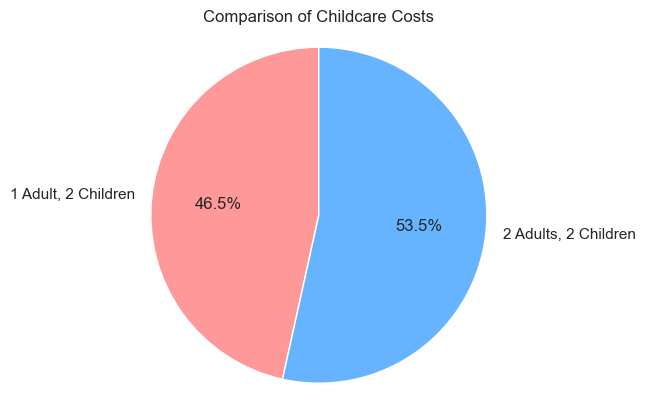

In [200]:

# סינון הנתונים לשורות בהן 'family_member_count' הוא '1p2c' או '2p2c'
filtered_1p2c = us_cost_df[us_cost_df['family_member_count'] == '1p2c']
filtered_2p2c = us_cost_df[us_cost_df['family_member_count'] == '2p2c']

# חישוב ממוצע של 'childcare_cost' עבור שתי הקבוצות
mean_childcare_cost_1p2c = filtered_1p2c['transportation_cost'].mean()
mean_childcare_cost_2p2c = filtered_2p2c['transportation_cost'].mean()

# יצירת גרף עוגה להשוואת עלויות הטיפול בילדים
labels = ['1 Adult, 2 Children', '2 Adults, 2 Children']
sizes = [mean_childcare_cost_1p2c, mean_childcare_cost_2p2c]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Comparison of Childcare Costs')
plt.show()

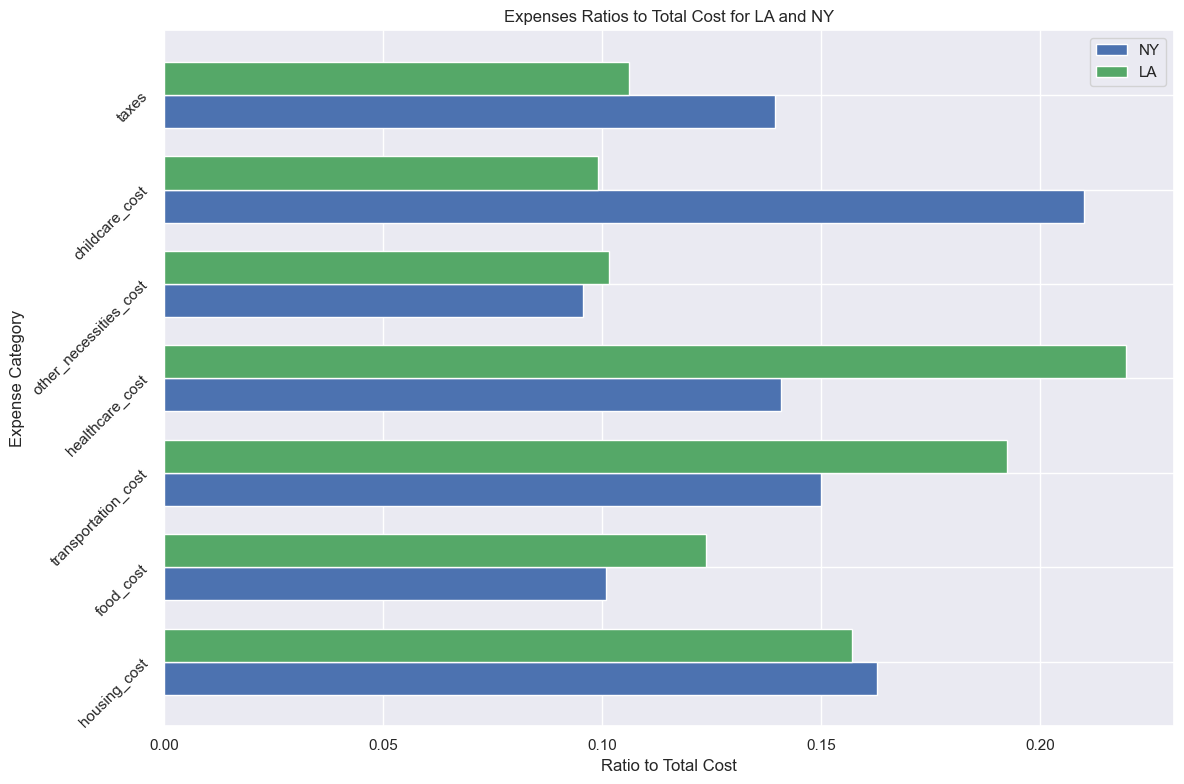

In [288]:
# Filter data for states NY and LA
df_ny = us_cost_df[us_cost_df['state'] == 'NY']
df_la = us_cost_df[us_cost_df['state'] == 'LA']

# Calculate average total cost for NY and LA
total_cost_ny_mean = df_ny['total_cost'].mean()
total_cost_la_mean = df_la['total_cost'].mean()

# Columns representing different expense categories
expenses_cols = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

# Calculate average expenses for NY and LA
expenses_ny_means = df_ny[expenses_cols].mean()
expenses_la_means = df_la[expenses_cols].mean()

# Create a horizontal bar plot comparing the expenses to total cost ratios for NY and LA
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(expenses_cols))
plt.barh(index, expenses_ny_means / total_cost_ny_mean, bar_width, label='NY', color='b')
plt.barh([i + bar_width for i in index], expenses_la_means / total_cost_la_mean, bar_width, label='LA', color='g')

plt.ylabel('Expense Category')
plt.xlabel('Ratio to Total Cost')
plt.title('Expenses Ratios to Total Cost for LA and NY')
plt.yticks([i + bar_width / 2 for i in index], expenses_cols, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


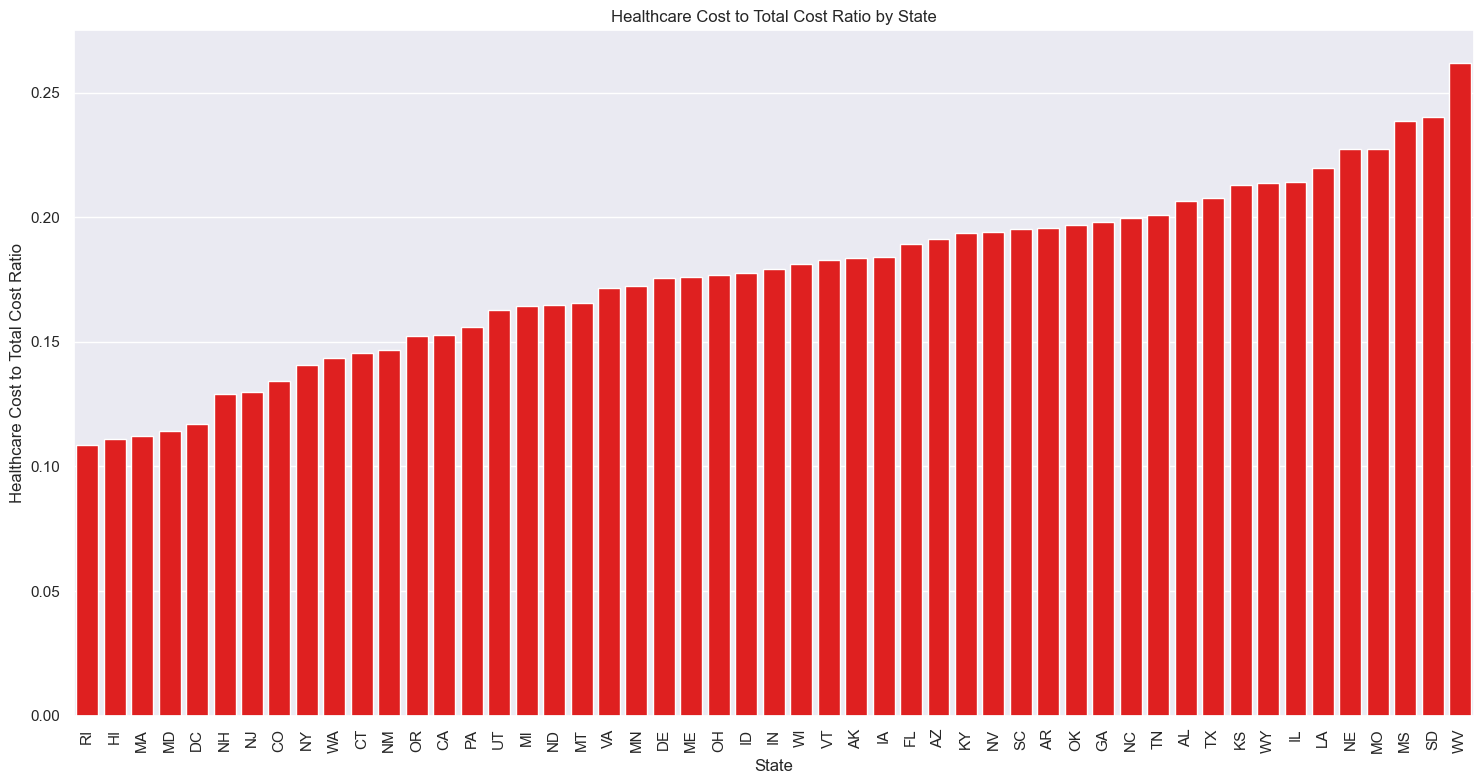

In [295]:
# Calculate the average total cost for each state
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().reset_index()

# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_total_cost, average_healthcare_cost, on='state')

# Calculate the ratio of average healthcare cost to average total cost for each state
average_data['healthcare_to_total_cost_ratio'] = average_data['healthcare_cost'] / average_data['total_cost']

# Sort the data by the ratio
average_data_sorted = average_data.sort_values('healthcare_to_total_cost_ratio', ascending=True)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='healthcare_to_total_cost_ratio', data=average_data_sorted, color='red')

plt.xlabel('State')
plt.ylabel('Healthcare Cost to Total Cost Ratio')
plt.title('Healthcare Cost to Total Cost Ratio by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



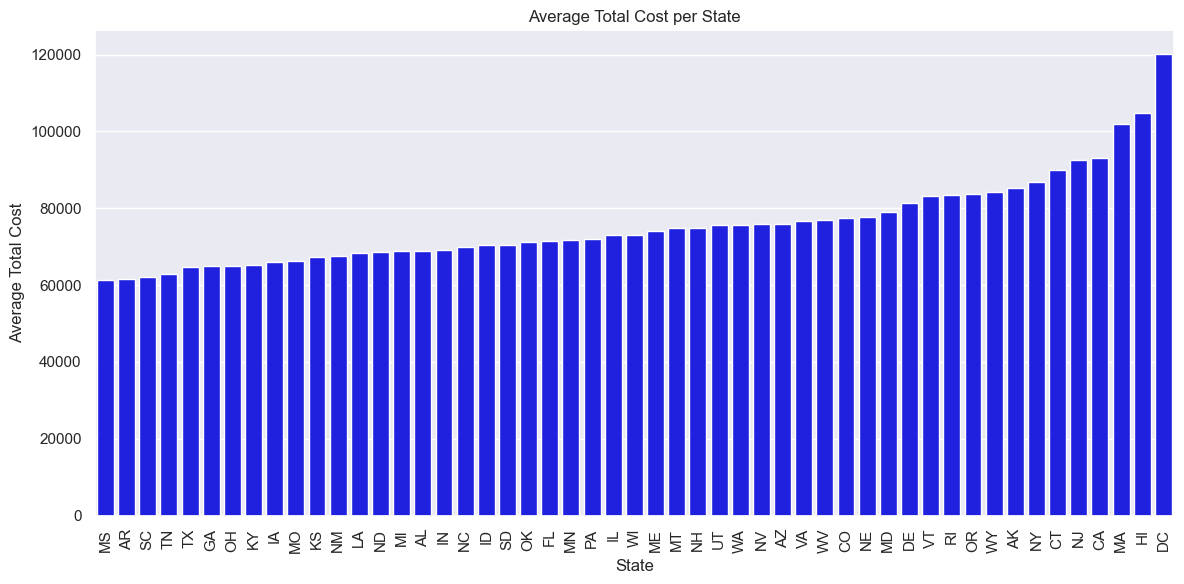

In [296]:
# חישוב ה-total cost ממוצע לכל מדינה
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# יצירת גרף בר המראה את ה-total cost ממוצע לכל מדינה
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total_cost', data=average_total_cost, color='blue')
plt.xlabel('State')
plt.ylabel('Average Total Cost')
plt.title('Average Total Cost per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

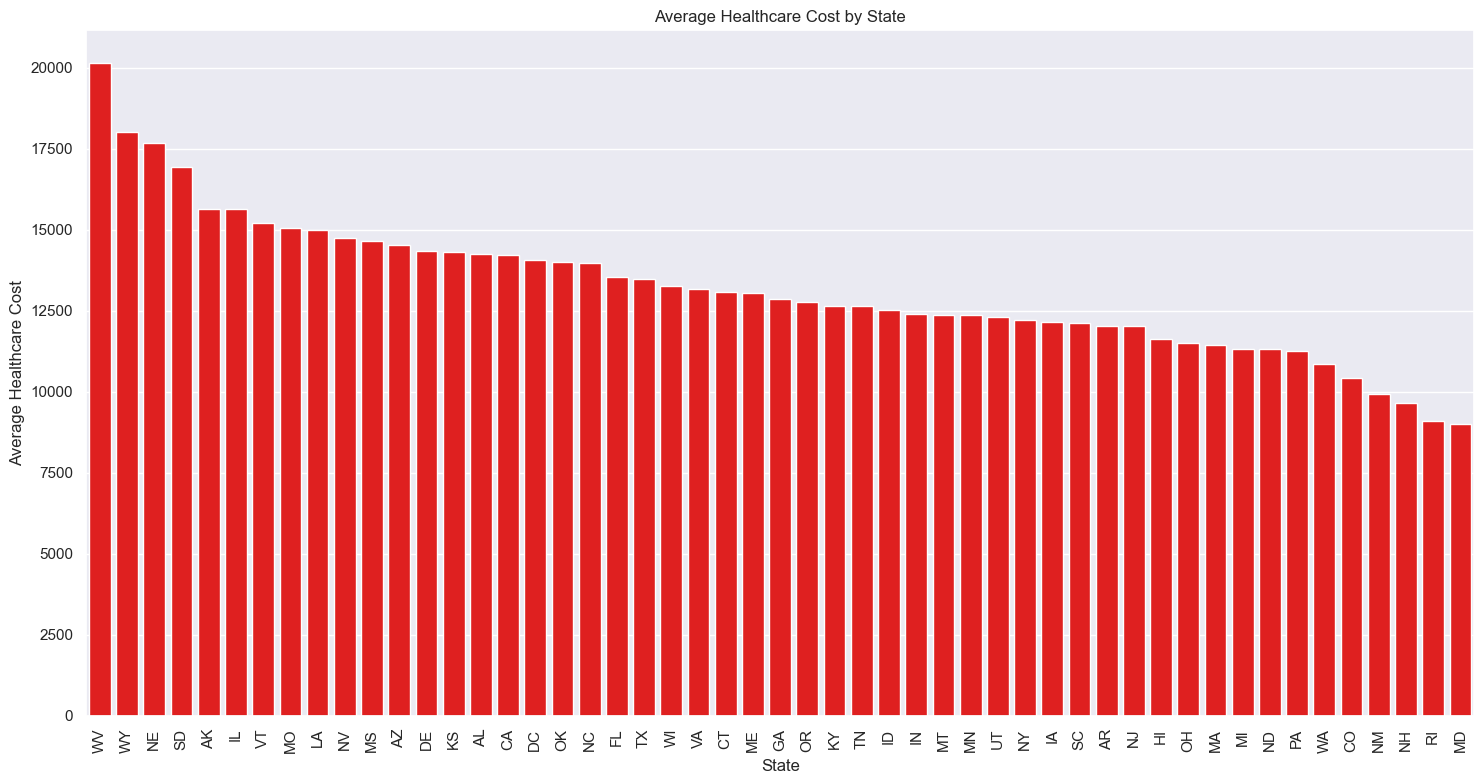

In [299]:
# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Sort the data by the average healthcare cost
average_healthcare_cost_sorted = average_healthcare_cost.sort_values('healthcare_cost', ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='state', y='healthcare_cost', data=average_healthcare_cost_sorted, color='red')

plt.xlabel('State')
plt.ylabel('Average Healthcare Cost')
plt.title('Average Healthcare Cost by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



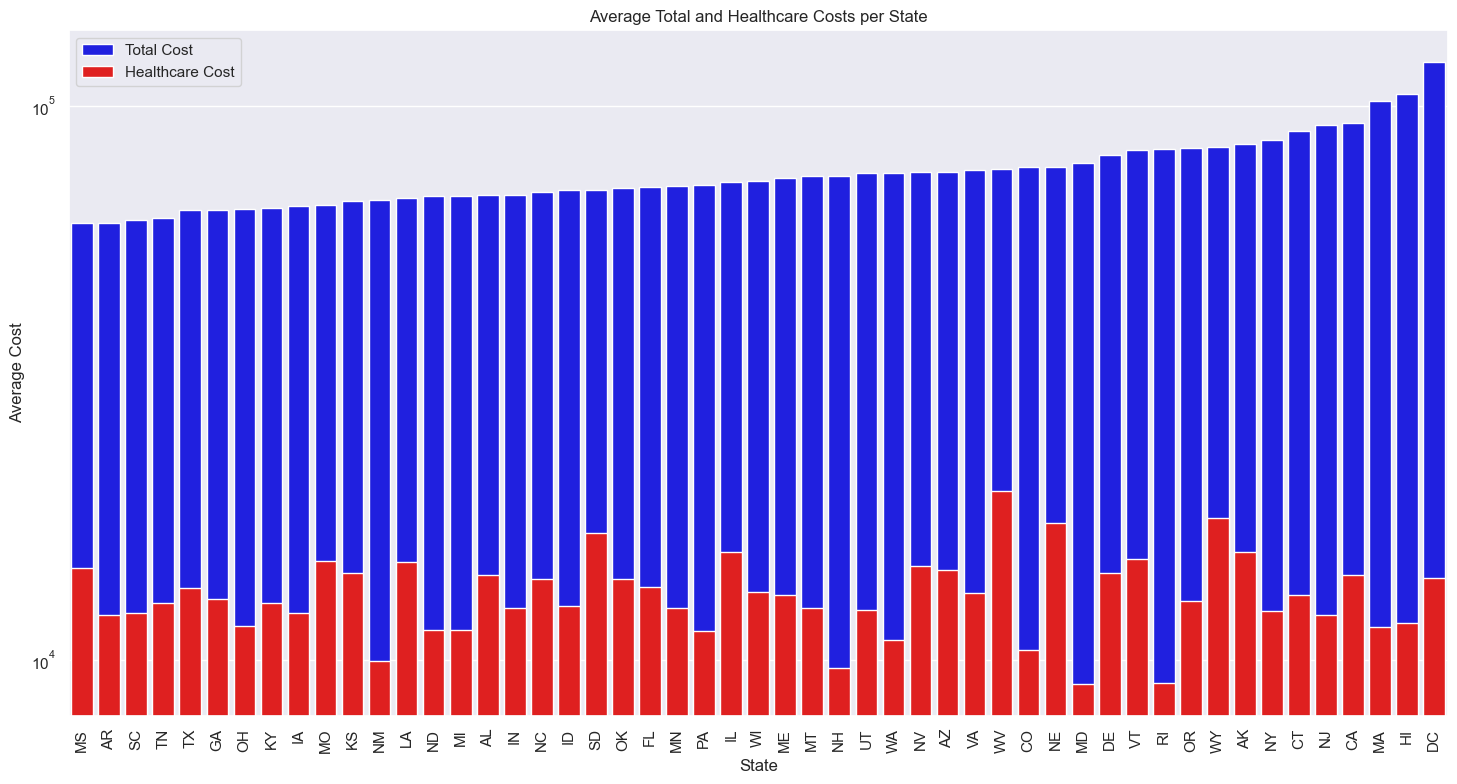

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the average total cost for each state
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_total_cost, average_healthcare_cost, on='state')

# Create a bar plot
plt.figure(figsize=(15, 8))
ax=sns.barplot(x='state', y='total_cost', data=average_data, color='blue', label='Total Cost')
ax=sns.barplot(x='state', y='healthcare_cost', data=average_data, color='red', label='Healthcare Cost')

plt.xlabel('State')
plt.ylabel('Average Cost')
plt.title('Average Total and Healthcare Costs per State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
ax.set_yscale("log")
plt.show()


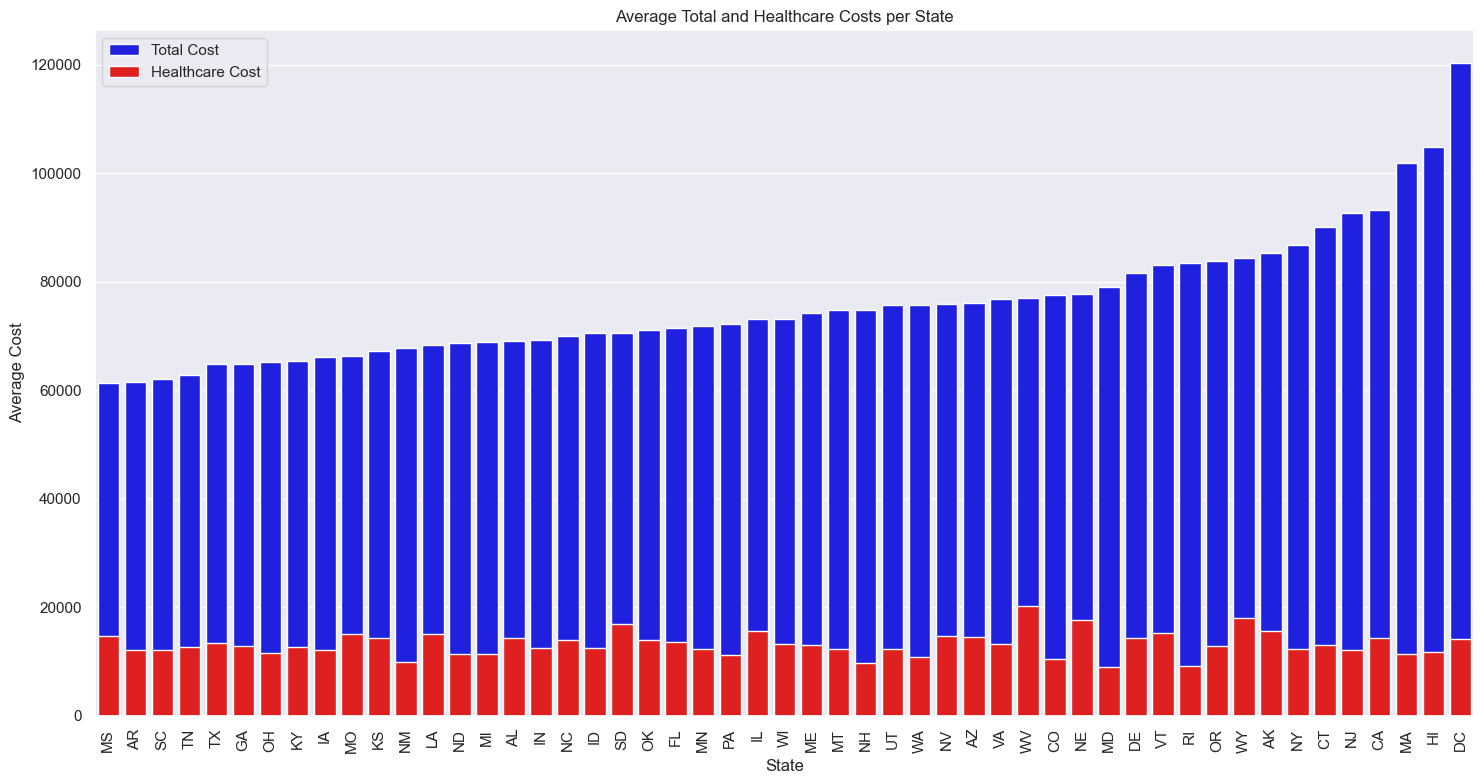

In [308]:
# Calculate the average total cost for each state
average_total_cost = us_cost_df.groupby('state')['total_cost'].mean().sort_values().reset_index()

# Calculate the average healthcare cost for each state
average_healthcare_cost = us_cost_df.groupby('state')['healthcare_cost'].mean().reset_index()

# Merge the two DataFrames
average_data = pd.merge(average_total_cost, average_healthcare_cost, on='state')

# Create a bar plot
plt.figure(figsize=(15, 8))
ax=sns.barplot(x='state', y='total_cost', data=average_data, color='blue', label='Total Cost')
ax=sns.barplot(x='state', y='healthcare_cost', data=average_data, color='red', label='Healthcare Cost')

plt.xlabel('State')
plt.ylabel('Average Cost')
plt.title('Average Total and Healthcare Costs per State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
